In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

In [5]:
# loading the data from csv file to a Panda Dataframe
path = '/content/drive/My Drive/DeepLearning/HeartDisease/'
heart_data = pd.read_csv(path + 'heart_disease_data.csv')

# printing the first 5 rows of the dataframe
heart_data.head()

X = heart_data.drop(columns='target', axis=1)
y = heart_data.target

### Feature Scaling
- applied for K-Means, K-Nearest-Neighbor, PCA, Gradient Descent
- not used for Naive Bayes, Linear Discriminant Analysis, Tree-Based models

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
X_transformed = scaler.transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
df = pd.DataFrame(X_transformed, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
df.head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


<Axes: title={'center': 'After Scaling'}, xlabel='age', ylabel='Density'>

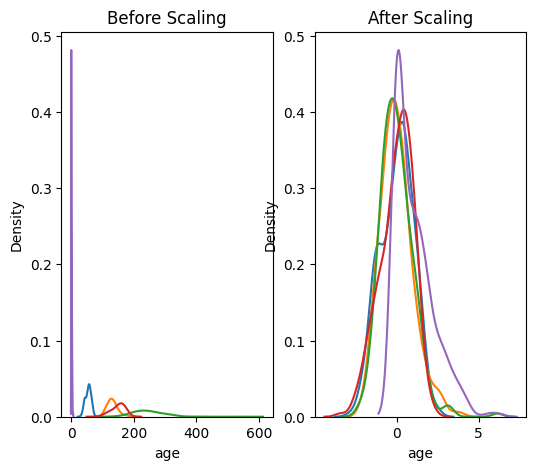

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X['age'], ax=ax1)
sns.kdeplot(X['trestbps'], ax=ax1)
sns.kdeplot(X['chol'], ax=ax1)
sns.kdeplot(X['thalach'], ax=ax1)
sns.kdeplot(X['oldpeak'], ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(df['age'], ax=ax2)
sns.kdeplot(df['trestbps'], ax=ax2)
sns.kdeplot(df['chol'], ax=ax2)
sns.kdeplot(df['thalach'], ax=ax2)
sns.kdeplot(X['oldpeak'], ax=ax2)

In [8]:
X_ = X.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], axis=1).reset_index().drop(['index'], axis=1)
X_.shape

(303, 8)

In [9]:
X_transformed_df = pd.DataFrame(X_transformed, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
X_transformed_df.shape

(303, 5)

In [10]:
X_transformed_df = pd.concat([X_transformed_df, X_], axis=1, sort=False)
X_transformed_df.shape

(303, 13)

In [11]:
# import pickle
# scaler_file = 'thescaler.sav'
# pickle.dump(thescaler, open(scaler_file, 'wb'))

## Model Training
#### Splitting the data to training data & valid data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_transformed_df, y, test_size=0.2, random_state=2)

- Applying PCA to down the size of the data.

In [13]:
from sklearn.decomposition import PCA
#Make an instance of the model
pca = PCA(.95)
pca.fit(X_train)
pca.n_components_

10

In [14]:
#Apply the mapping (transform) to both the training set and the valid set
X_train = pca.transform(X_train)
X_valid = pca.transform(X_valid)

### 1. Create model

- ### K-Nearest Neighbors
- - #### Selecting the K value

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k_list = []
acc_list = []
for K_value in range(1, int(y_train.shape[0]**0.5)): #k = sqrt(n)/2
    k_list.append(K_value)
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)*100
    acc_list.append(acc)
    print(f'Accuracy= {accuracy_score(y_valid, y_pred)*100}% for K_value {K_value}')

Accuracy= 85.24590163934425% for K_value 1
Accuracy= 83.60655737704919% for K_value 2
Accuracy= 83.60655737704919% for K_value 3
Accuracy= 85.24590163934425% for K_value 4
Accuracy= 85.24590163934425% for K_value 5
Accuracy= 85.24590163934425% for K_value 6
Accuracy= 85.24590163934425% for K_value 7
Accuracy= 86.88524590163934% for K_value 8
Accuracy= 86.88524590163934% for K_value 9
Accuracy= 86.88524590163934% for K_value 10
Accuracy= 85.24590163934425% for K_value 11
Accuracy= 85.24590163934425% for K_value 12
Accuracy= 85.24590163934425% for K_value 13
Accuracy= 85.24590163934425% for K_value 14


In [16]:
where = acc_list.index(max(acc_list))
k = k_list[where]

print(f"\nThe optimal number of neighbors= {k, acc_list[where]}%")


The optimal number of neighbors= (8, 86.88524590163934)%


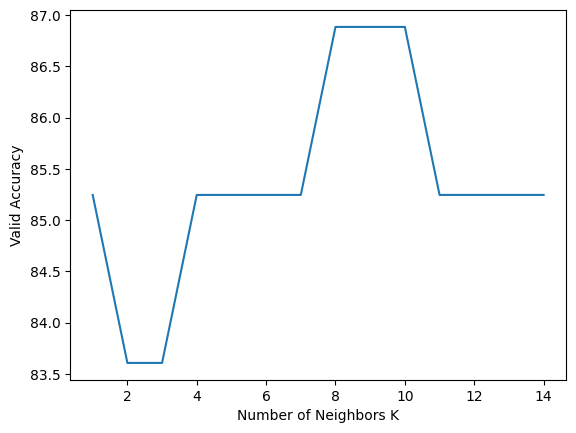

In [17]:
import matplotlib.pyplot as plt
plt.plot(k_list, acc_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Valid Accuracy')
plt.show()

#### Applying the K value (4) for the Model

In [18]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

### 2. Validate model

In [19]:
print(mean_absolute_error(y_valid, y_pred))

0.14754098360655737


### 3. Evaluate model
#### Accuracy Score

In [20]:
# accuracy score on the valid data
print(f'Accuracy score of valid data: {accuracy_score(y_valid, y_pred)}')
# accuracy score on the training data
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data: {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data: 0.8524590163934426
Accuracy score of training data: 0.8471074380165289


In [21]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 85.24590163934425%
The train score of training data= 84.71074380165288%


In [22]:
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[25  7]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [23]:
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

Precision= 0.7941176470588235
Recall= 0.9310344827586207


In [24]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_valid.values)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0


-  ### K-Means (Unsupervised Learning)
- #### Determining K

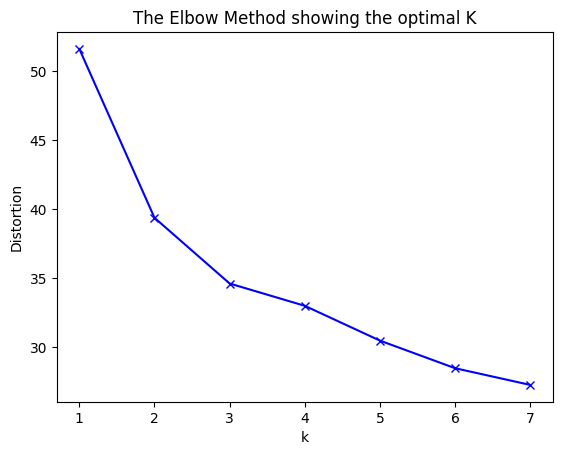

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])

#plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

>We will select K = 2.
#### Applying the K value (2) for the Model

In [26]:
model = KMeans(n_clusters=2)
model.fit(X_transformed_df)

KMeans(n_clusters=2)

In [27]:
centroids = model.cluster_centers_
labels = model.labels_
print(centroids)
print(labels)

[[ 0.54996676  0.19570638  0.17824605 -0.7893455   0.67048937  0.71428571
   0.31932773  0.15966387  0.47058824  0.62184874  1.04201681  1.28571429
   2.49579832]
 [-0.35568503 -0.12657097 -0.11527869  0.51050062 -0.43363171  0.66304348
   1.38586957  0.14130435  0.56521739  0.13586957  1.63043478  0.36956522
   2.19565217]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 1]


In [28]:
print(mean_absolute_error(y, labels))

0.2145214521452145


In [29]:
print(accuracy_score(y, labels))

0.7854785478547854


In [30]:
print(confusion_matrix(y, labels))
print(classification_report(y, labels))

[[ 96  42]
 [ 23 142]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       138
           1       0.77      0.86      0.81       165

    accuracy                           0.79       303
   macro avg       0.79      0.78      0.78       303
weighted avg       0.79      0.79      0.78       303



In [31]:
print(f'Precision= {precision_score(y, labels)}')
print(f'Recall= {recall_score(y, labels)}')

Precision= 0.7717391304347826
Recall= 0.8606060606060606


In [32]:
len(X.columns)

13

In [33]:
X_train[0]

array([ 1.04387133,  0.27557189,  1.19836224,  0.17642974,  1.42628111,
        0.12777132, -0.55593974, -0.50600425, -0.31171728,  0.23992881])

-  ### Gradient Descent (Deep Learning)
- #### ANN (Artificial Neural Networks)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [35]:
#Initialing the ANN
model = Sequential()

#Adding the input layer and the first hidden layer
model.add(Dense(units=6,
                kernel_initializer='uniform',
                activation='relu',
                input_dim=10))
#model.add(Dropout(p=0.1))

#Adding the second hidden layer
model.add(Dense(units=6,
                kernel_initializer='uniform',
                activation='relu'))
#model.add(Dropout(p=0.1))

#Adding the output layer
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

In [36]:
#compiling ANN
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
#Fitting model to the training set
model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5661
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5620
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5620
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5620
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.5620
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.5620
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.5620
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.5620
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.5620
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.5620
Epoch 11/

In [38]:
#predict the valid set
y_pred = model.predict(X_valid)
y_pred[:5]

2/2 [==============================] - 0s 4ms/step


array([[0.6724549 ],
       [0.94638276],
       [0.7883125 ],
       [0.97664326],
       [0.23891264]], dtype=float32)

In [39]:
y_pred = y_pred > 0.5
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [40]:
#evaluate the model
scores = model.evaluate(X_train, y_train)
scores[1]*100

8/8 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8760


87.6033067703247

In [41]:
#make the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)
cm

array([[29,  3],
       [ 0, 29]])

In [42]:
acc = (cm[0][0] + cm[1][1])/(sum(cm)[0] + sum(cm)[1])
acc*100

95.08196721311475

In [43]:
#save the result
from keras.models import load_model
#create a HDF5 file 'model.h5'
model.save('model.h5')

In [44]:
#make a new prediction
input_data = [57,1,0,140,192,0,1,148,0,0.4,1,0,1]

In [46]:
ls=[]
for i in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    for j in range(len(X.columns)):
        if i in X.columns[j]:
            ls.append(j)
ls

[0, 3, 4, 7, 9]

In [47]:
input_data

[57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1]

In [53]:
input_5 = []
for i in ls:
    input_5.append(input_data[i])
input_5

[57, 140, 192, 148, 0.4]

In [50]:
input_8 = input_data.copy()
for i in range(len(ls)):
    input_8.pop(i)
input_8

[1, 140, 0, 148, 0.4, 1, 0, 1]

In [54]:
input_scaled_5 = scaler.transform([input_5])
input_scaled_5

array([[ 0.29046364,  0.47839125, -1.04867848, -0.07201822, -0.55178349]])

In [55]:
input_concat = np.concatenate((input_scaled_5, input_8), axis=None)
input_concat.shape

(13,)

In [56]:
input_concat_pca = pca.transform([input_concat])
input_concat_pca.shape

(1, 10)

In [57]:
prediction = model.predict(input_concat_pca)
print(prediction)
if (prediction[0] == 0):
    print("The Person does not have a Heart Disease.")
else:
    print("The Person has Heart Disease.")



1/1 [==============================] - 0s 15ms/step
[[1.]]
The Person has Heart Disease.
